## (A) Identification of Candidate Datasets

1. Demystifying Hateful Content: Leveraging Large Multimodal Models for Hateful Meme Detection with Explainable Decisions (ICWSM 2025)<br>
**Dataset name and source**: FHM-FG (an extension of the Facebook Hateful Memes dataset by Meta AI), MAMI (misogynous memes collected from social media websites) and HarMeme (hateful memes collected from google image search) The dataset is available to view here: https://github.com/Social-AI-Studio/IntMeme/tree/main/datasets<br>
**Course Technique**: Text mining/classification, anomaly detection<br>
**Beyond Course**: Multimodal Learning (combining text + image memes) and Large Multimodal Models (LMMs). <br>
**Dataset size and structure**: Approximately 10k+ total samples. It is structured into a large training set and a smaller test set designed to prevent models from "cheating" using simple image or text patterns, a folder of images paired with a JSON file (each entry contains an image ID, the text found in the meme, and a binary label) <br>
**Data types**: images (png/jpg format), OCR text (string), identity labels (race, religion, etc.), and binary integers 0 for benign and 1 for hateful.<br>
**Target variable(s)**: Binary label (Hateful vs. Non-hateful).<br>
**Licensing or usage constraints**: Available under the Facebook Open Data Agreement for non-commercial research purposes.

2. EscapeBench: Towards Advancing Creative Intelligence of Language Model Agents (ACL 2025) <br>
**Dataset name and source**: EscapeBench dataset was custom made by the authors of the paper to test creative problem-solving in simulated "Escape Room" environments. The dataset can be found here: https://github.com/qiancheng0/EscapeBench/tree/main/data.<br>
**Course Technique**: Text mining and graph mining<br>
**Beyond Course**: LLM agents & multi-agent systems and iterative problem solving. <br>
**Dataset size and structure**: The dataset contains 100 base game scenarios written in yaml files, these are expanded into 600 unique test cases across various difficulty levels. yaml file contains name, description, scene relations, textual descriptions such as room settings, item attributes, and feedback messages. <br>
**Data types**: strings for textual descriptions, actions with commands such as move, click, apply, etc., and solutions.<br>
**Target variable(s)**: Escape success rate that indicates binary sucess/failure metric, efficiency metrics such as number of hints used and number of steps taken.<br>
**Licensing or usage constraints**: Released under the MIT License, it is open-source for academic and commercial use.

3. Non-parametric Graph Convolution for Re-ranking in Recommendation Systems (RecSys 2025)
**Dataset name and source**: The paper uses Yelp 2018 dataset from the Yelp 2018 Challenge. The dataset is publicly available here: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset<br>
**Course Technique**: Graph mining, text mining, pagerank<br>
**Beyond Course**: Non-parametrized graph convolution. <br>
**Dataset size and structure**: The dataset over 170k businesses, 5.2 million reviews, from 1.2+ million users. The dataset contains 5 json files, one with reviews that contains user_id, business_id, and review made by the user_id, one with business_id that matches business name, one with user_id that matches user name, one with tips, and the 5th json file with check-in time stamps. The json files are easy to read and parse.<br>
**Data types**: Hashed strings (user_id, business_id, review_id), numerical values such as stars, longitude and latitude, and categories and review that are strings.<br>
**Target variable(s)**: stars received by each business.<br>
**Licensing or usage constraints**: Restricted to personal, educational, and non-commercial academic use. Metadata must not be used to re-identify individuals.

## (B) Comparative Analysis of Datasets

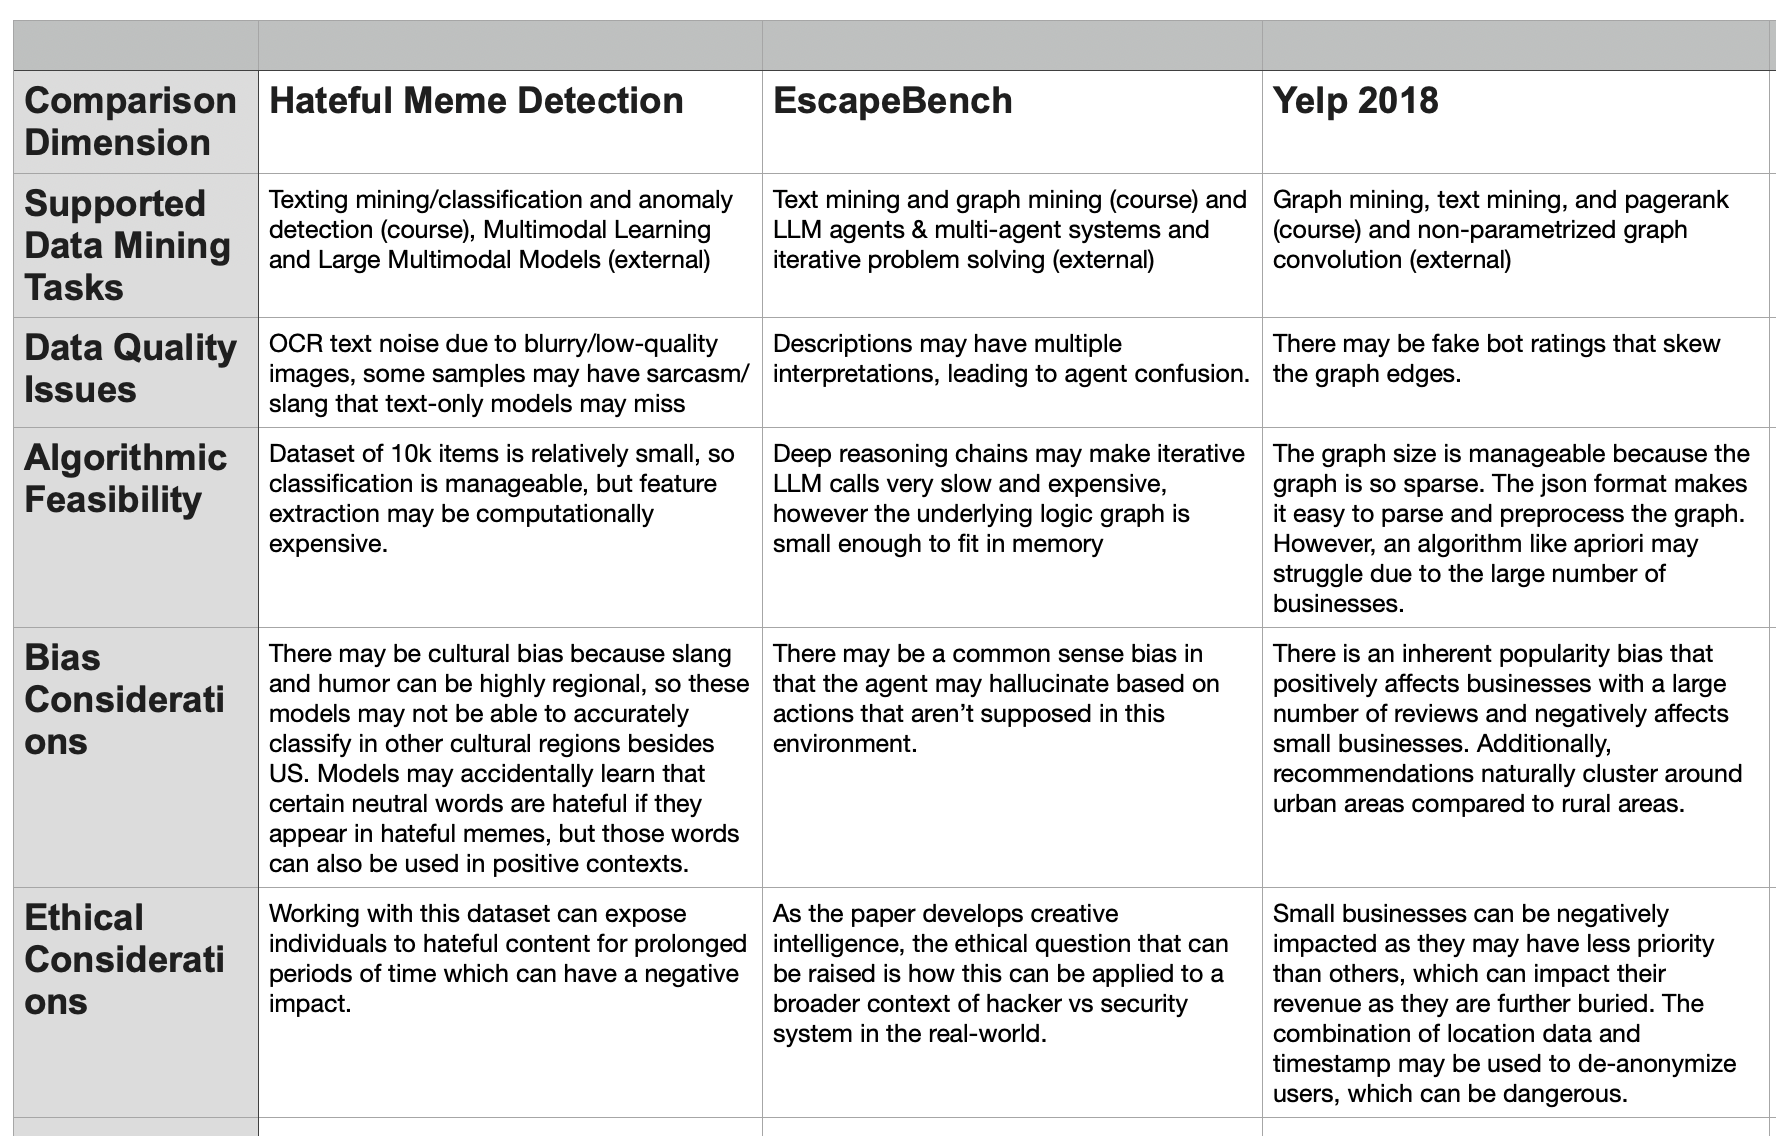

## (C) Dataset Selection

**Yelp 2018 dataset**

**Reasons**:
- This is a bipartite graph which contains {users} <--> {business} connections
- This dataset supports graph mining, text mining, pagerank, all of which
are part of the course techniques
- Supports non-parametrized graph convolution which facilitates re-ranking, which is beyond the scope of the course
- Allows meaningful comparison between pagerank and community detection results against the results of GCN.

**Trade-offs:**
- The bipartite structure means that it will be difficult to run standard social network algorithms without some preprocessing like graph projection.
- This graph may be sparse because users visit a small percentage of restaurants, so it will be difficult running community detection or association rules without some tweaks
(eg. only look at users who have reviewed at least 20 restaurants).

## (D) Exploratory Data Analysis

In [2]:
# file names
review_json = "yelp_academic_dataset_review.json"
business_json = "yelp_academic_dataset_business.json"
user_json = "yelp_academic_dataset_user.json"
tip_json = "yelp_academic_dataset_tip.json"
checkin_json = "yelp_academic_dataset_checkin.json"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def load_json_file(filename, limit=None):
    data = []
    with open(filename, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if limit and i >= limit:
                break
            data.append(json.loads(line))
    return pd.DataFrame(data)

df_business = load_json_file(business_json)
print(f"Loaded {len(df_business)} businesses.")

df_reviews = load_json_file(review_json)
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
print(f"Loaded {len(df_reviews)} reviews.")

assert 'business_id' in df_business.columns, "business_id not found in business json"
assert 'user_id' in df_reviews.columns, "user_id not found in review json"

Loaded 174567 businesses.
Loaded 5261669 reviews.


The load_json_file function uses a for line in f loop which is a memory-efficient way to read json files instead of reading the entire file into a single string buffer before parsing. pd.to_datetime(df_reviews['date']) handles the conversion of raw strings into datetime objects because the real-world dataset uses various formats for date and time that must be made uniform and consistent. We load the business so that we can do some analysis later on what type of categories of businesses are most reviewed, and what businesses have the highest reviews. The reviews are loaded to determine the distribution of ratings, user to review counts, etc. Lastly, we make sure that business id and user id are present as expected.

Analyzing Basket Sizes


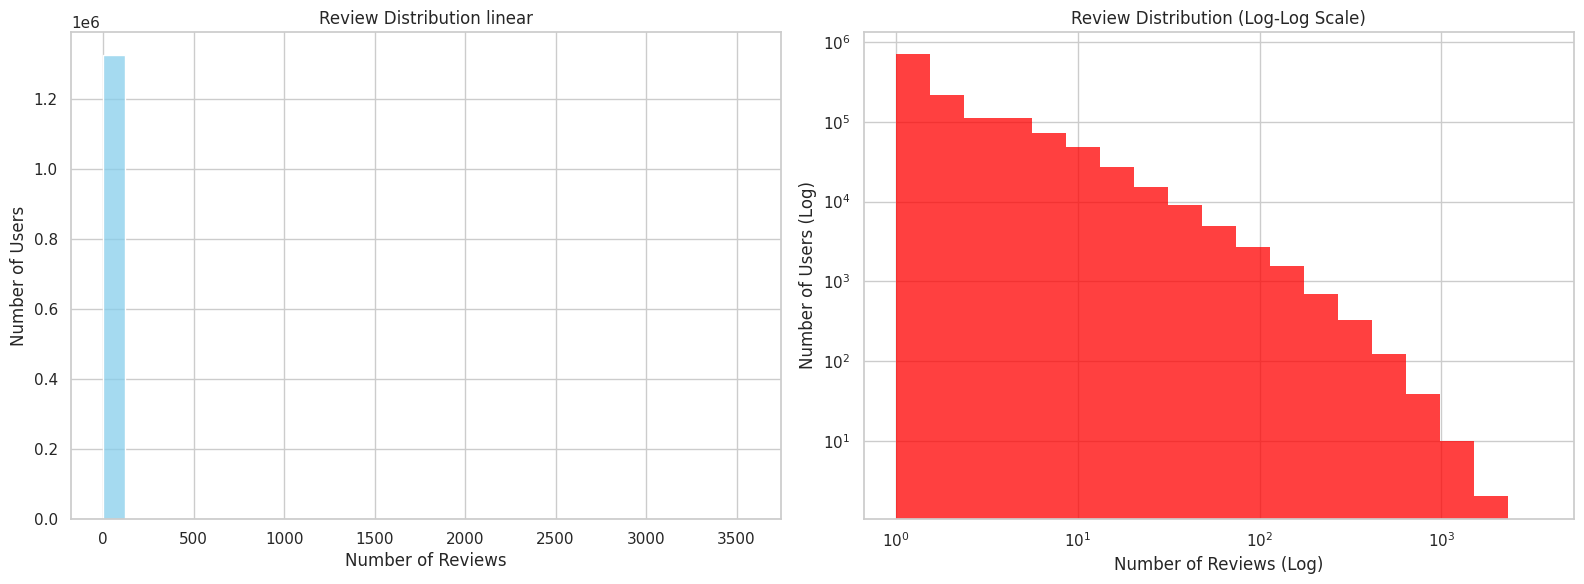

Average reviews per user: 3.97
Median reviews per user: 1.00


In [3]:
import numpy as np

print("Analyzing Basket Sizes")
user_counts = df_reviews.groupby('user_id').size()

assert user_counts.sum() == len(df_reviews), "Review count mismatch"

assert (user_counts > 0).all(), "Users with 0 reviews"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(user_counts, bins=30, ax=ax1, color='skyblue')
ax1.set_title('Review Distribution linear')
ax1.set_xlabel('Number of Reviews')
ax1.set_ylabel('Number of Users')

bins = np.logspace(np.log10(1), np.log10(user_counts.max()), 20)
sns.histplot(user_counts, bins=bins, ax=ax2, color='red')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Review Distribution (Log-Log Scale)')
ax2.set_xlabel('Number of Reviews (Log)')
ax2.set_ylabel('Number of Users (Log)')

plt.tight_layout()
plt.show()

print(f"Average reviews per user: {user_counts.mean():.2f}")
print(f"Median reviews per user: {user_counts.median():.2f}")

The code uses log scale for the distribution of reviews per user. In a linear scale, the users with a high amount of reviews would be invisible or would make the 1-review users look like a single giant spike as seen above. Log scaling reveals the underlying structure of the graph as seen above on the right.

Analyzing Top Items


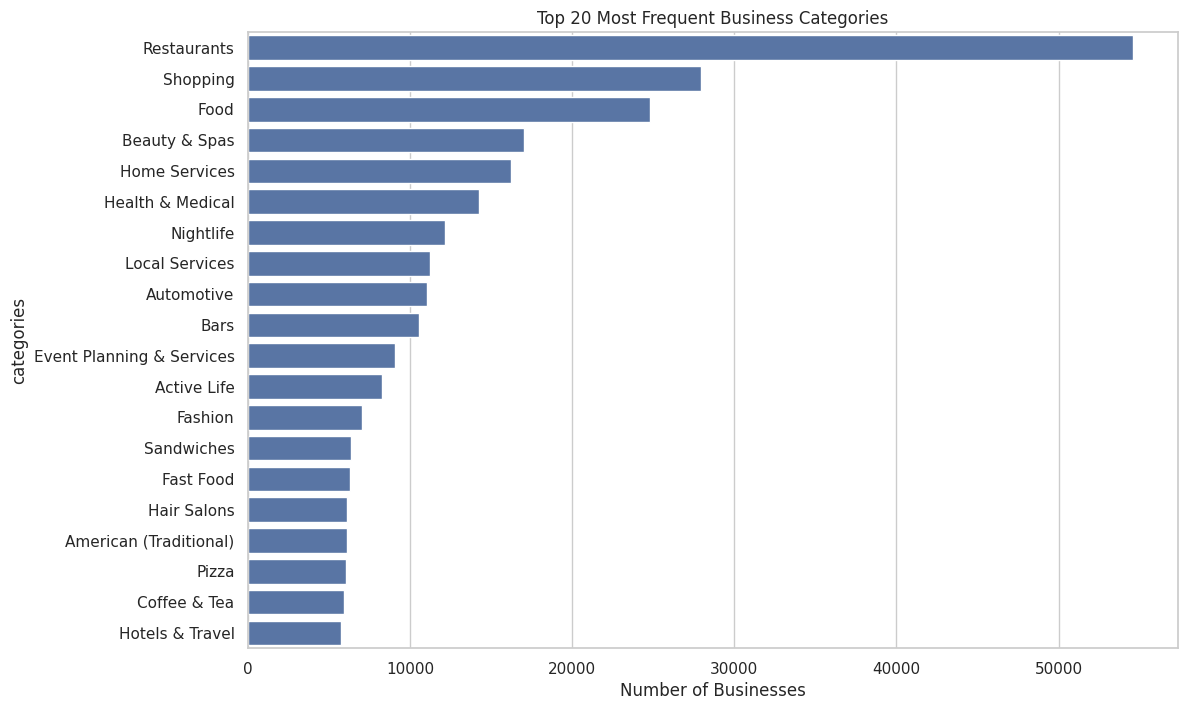


Top 10 Businesses by Review Count:
                          name  review_count  stars
97944             Mon Ami Gabi          7361    4.0
119907        Bacchanal Buffet          7009    4.0
69993             Wicked Spoon          5950    3.5
81212      Gordon Ramsay BurGR          5447    4.0
139699        Earl of Sandwich          4869    4.5
19191       Hash House A Go Go          4774    4.0
80590               The Buffet          4018    3.5
124412           Lotus of Siam          3964    4.0
21006            Serendipity 3          3910    3.0
93038   The Buffet at Bellagio          3838    3.5


In [4]:
# Frequency of Top Items (Top Categories & Businesses)
print("Analyzing Top Items")

categories = df_business['categories'].dropna().str.split(', ').explode()
top_categories = categories.value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_categories.index, x=top_categories.values)
plt.title('Top 20 Most Frequent Business Categories')
plt.xlabel('Number of Businesses')
plt.show()

# Top Businesses by number of reviews
top_businesses = df_business.sort_values(by='review_count', ascending=False).head(10)
print("\nTop 10 Businesses by Review Count:")
print(top_businesses[['name', 'review_count', 'stars']])

In the above analysis for categories, the code uses df_business['categories'].dropna() to ensure that businesses without category mentioned don't crash the split function. The script uses .str.split(', ').explode() to transform any noisy string into a clean list. This allows for the actual count of item frequencies rather than treating "Food, Pizza" as a different category than "Pizza, Food." The observation for the above data will be discussed in the next section.

In [5]:
# Sparsity of Item Co-occurrence
print("Analyzing Sparsity")

n_users = df_reviews['user_id'].nunique()
n_items = df_reviews['business_id'].nunique()
n_interactions = len(df_reviews)

possible_interactions = n_users * n_items
sparsity = 1 - (n_interactions / possible_interactions)
print(f"Total Users: {n_users}")
print(f"Total Businesses: {n_items}")
print(f"Total Interactions: {n_interactions}")
print(f"Sparsity: {sparsity:.6%}")

Analyzing Sparsity
Total Users: 1326101
Total Businesses: 174567
Total Interactions: 5261669
Sparsity: 99.997727%


We are calculating sparsity to determine how dense and interconnected the graph is here and to gather basic details about the graph such as users, number of businesses etc.

Initial Observations & Recommendations


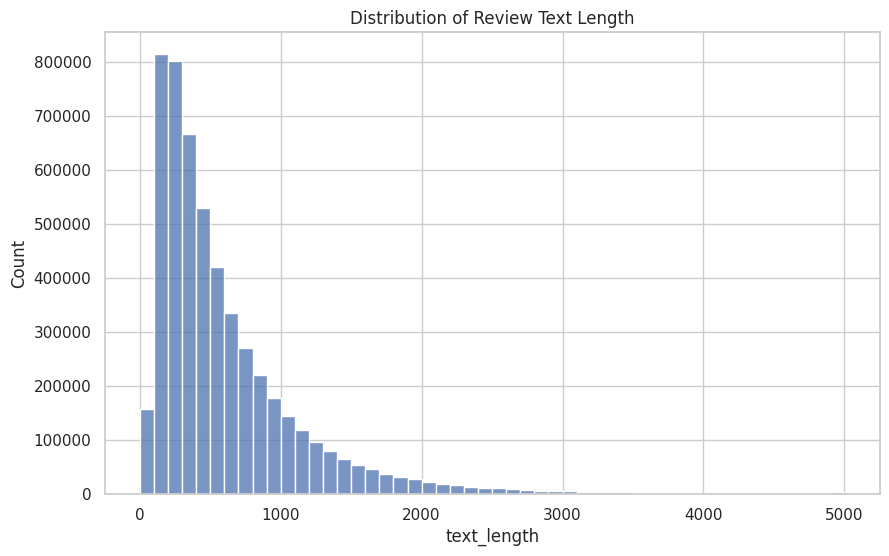

In [6]:
print("Initial Observations & Recommendations")
df_reviews['text_length'] = df_reviews['text'].apply(len)

assert (df_reviews['text_length'] >= 0).all(), "Found negative text lengths"
assert df_reviews['text_length'].mean() > 0, "Average review length is 0, there may have been a data loading issue"

plt.figure(figsize=(10,6))
sns.histplot(df_reviews['text_length'], bins=50)
plt.title('Distribution of Review Text Length')
plt.show()

We calculate the distribution of text length to see how big the average review is by a user. We make sure that we don't have any unrealistic text lengths.

Analyzing check-in patterns


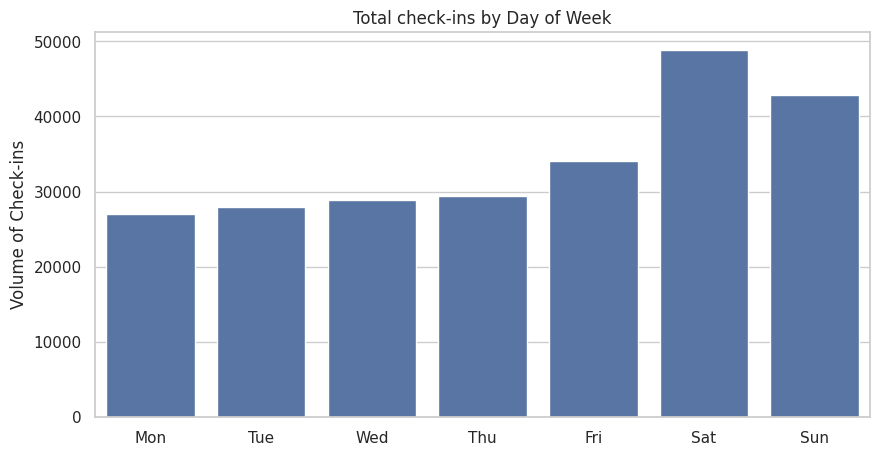


Analyzing rating distribution


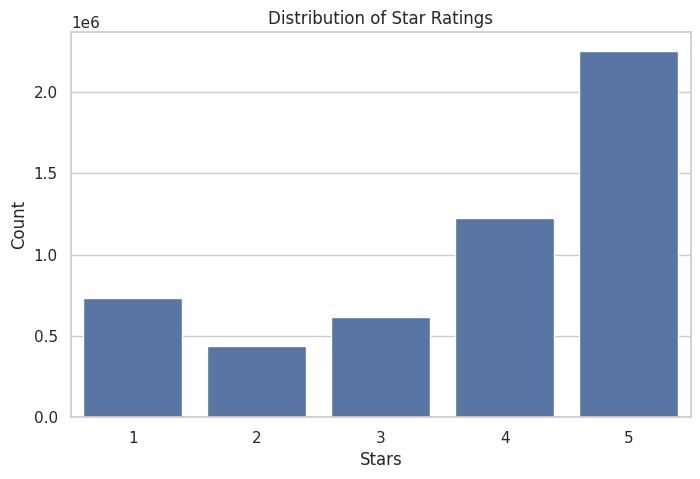

In [9]:
print("Analyzing check-in patterns")
df_checkin = load_json_file(checkin_json, limit=5000)

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_counts = {day: 0 for day in days}

for row in df_checkin['time']:
    for key, count in row.items():
        day = key.split('-')[0]
        if day in day_counts:
            day_counts[day] += count

plt.figure(figsize=(10, 5))
sns.barplot(x=list(day_counts.keys()), y=list(day_counts.values()))
plt.title('Total check-ins by Day of Week')
plt.ylabel('Volume of Check-ins')
plt.show()

# Rating Distribution
print("\nAnalyzing rating distribution")
plt.figure(figsize=(8, 5))
sns.countplot(data=df_reviews, x='stars')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

## (E) Initial Insights and Direction

**Observations:**

- Many people in the dataset have 1-2 reviews. This can be observed in the average reviews per user, which is 3.97, and the median reviews per user which is 1. The median is 1 because there is a high amount of users who only made 1 review on their yelp account in 2018. As observed in the highly skewed distribution plot in log scale above, the highest number of reviews per user is 1, and the number of users decrease with number of reviews. This makes sense because an average person probably eats out at more than 1 restaurant a year, but just based on human behavior, they will only likely go out of their way to review a restaurant if it was remarkably good or remarkably bad.
- The top 3 businesses reviewed on yelp are in the categories restaurants, shopping, and food, which makes sense because people visit food establishments more than shopping establishments in a year (except grocery stores). Additionally, I would argue that yelp is more popular as a website for restaurants more than any other type of business category, which contributes to the top 3 rankings.
- 9 out of 10 of the top 10 businesses with the most reviews are in Vegas. This is unsurprising as Vegas sees millions of tourists every year from around the world, and these restaurants sit right on the iconic Las Vegas strip which these tourists visit.
- The most number of check-ins during the week is on saturday and sunday, which is unsurprising as most people are free on the weekend and tend to make eating and shopping their weekend plans.
- The order of star ratings in descending order is 5, 4, 1, 3, and 2.
- The sparsity is very huge (99.9%) because most users have only visited a small fraction of the 174k businesses in the dataset. Most businesses have never been visited by most users.
- The boxplot indicates that while most reviews are short (around 50-100 words), there are significant outliers with very high word counts, suggesting some users provide much denser textual information than others.


**Hypotheses:**

- Because the matrix is so sparse, standard Association Rules (like Apriori) will likely fail to find patterns for 90% of the users because they don't meet the minimum "Support" threshold.


**Potential RQ's:**

- How does the performance of frequent itemset mining compare to graph convolution when generating recommendations for "low-support" users?
- Does the non-parametric graph convolution technique from the paper specifically improve results for the 1-review users, or does it primarily benefit the users who already have dense data?
- Can the textual sentiment of the reviews be used as initial node weights in a pagerank algorithm to improve the quality of community detection?

On my honor, I declare the following resources:
1. Collaborators:

2. Web Sources:
- https://recsys.acm.org/recsys25/accepted-contributions/
- https://2025.aclweb.org/program/main_papers/
- https://www.icwsm.org/2025/schedule/allpapers.html

3. AI Tools:
- I used chatgpt to gather ideas on what kind of data would be interesting to extract in the EDA of the yelp dataset. For example, it gave me the idea to do a distribution of text length which I hadn't previously considered. I also used it to debug my code.

4. Citations
*   Hee, M. S., & Lee, R. K.-W. (2025). Demystifying Hateful Content: Leveraging Large Multimodal Models for Hateful Meme Detection with Explainable Decisions. Proceedings of the International AAAI Conference on Web and Social Media, 19(1), 774-785. https://doi.org/10.1609/icwsm.v19i1.35845
*   Cheng Qian, Peixuan Han, Qinyu Luo, Bingxiang He, Xiusi Chen, Yuji Zhang, Hongyi Du, Jiarui Yao, Xiaocheng Yang, Denghui Zhang, Yunzhu Li, and Heng Ji. 2025. EscapeBench: Towards Advancing Creative Intelligence of Language Model Agents. In Proceedings of the 63rd Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers), pages 798–820, Vienna, Austria. Association for Computational Linguistics.
*   Zhongyu Ouyang, Mingxuan Ju, Soroush Vosoughi, and Yanfang Ye. 2025. Non-parametric Graph Convolution for Re-ranking in Recommendation Systems. In Proceedings of the Nineteenth ACM Conference on Recommender Systems (RecSys '25). Association for Computing Machinery, New York, NY, USA, 330–339. https://doi.org/10.1145/3705328.3748058

